# IMPORT THE PYPLOT MODULE OF MATPLOTLIB

In [1]:
# installing the modules used in the notebook
'''
! pip install pydataset
! pip install matplotlib
! pip install pandas
! pip install seaborn
'''

# import common packages
from pydataset import data # this package imports example datasets to use for plotting
import pandas as pd
import datetime as datetime
import numpy as np


# import packages for visualizations:
# matplotlib is a library to create plots (a plot = a chart, a graph, a visualization)
import matplotlib.pyplot as plt # pyplot is an interface to use matplotlib
import matplotlib.dates as mdates # mdates is useful to work with dates on plots
import matplotlib.ticker as tkr # tkr is useful to format the axis labels on the plot
from matplotlib.patches import Patch # Patch creates legend elements: rectangles of a given color + a label

# GENERAL RULES OF PLOTTING

* Show <b>all and only</b> the necessary information: 
    * <b>Keep it obvious</b>: clear labels for the x and y axes, title, etc. 
    * <b>High data/ink ratio</b>: remove 3D or shadow effects, background images, unnecessary borders or grid lines. 
    

* To make a point, <b>highlight what matters</b>, hide what's distracting


* When presenting a plot, describe out loud everything on it. <b>If the audience is listening, they can't be reading the labels at the same time</b>, do it for them: "On the x axis you can see blablabla".



# QUESTIONS TO ASK YOURSELF AFTER MAKING A PLOT

1. <b>Are more labels or legends needed</b>? Be explicit.

2. <b>Can anything be removed</b> without losing clarity?
Eg. if the x axis is a date, no need for an x label, everyone recognizes a date

3. <b>How can I make my plot easy to read?</b>
Eg. use soft colors for what's not important, bright colors for what requires attention. Zoom in, etc.

# HIGH LEVEL STRUCTURE OF A MATPLOTLIB FIGURE

* The object <b>fig</b> is the figure. It contains everything, determines the size, and can be saved as an image file.
* The object <b>axes</b> is a collection of plots (individual plots are often called ax).
* An <b>axis</b> is an element of a plot that determines where each point/line etc is drawn. The plural of "axis" is "axes", so "2 axes" can be either the x and y axes of a plot, or 2 separate plots.

![fig and axes structure >](fig_axes_axis.png)

# LOWER LEVEL STRUCTURE OF A FIGURE

* Every element can be accessed and customized. An element is called an artist.
* An axis is a complex part of a plot. It is made of several artists: major ticks, minor ticks, an overall axis label, and ticks labels


![everything_is_an_artist >](everything_is_an_artist.png)

# INTERFACE PROGRAMMING

One can plot things interacting with matplotlib through pyplot without creating variables:

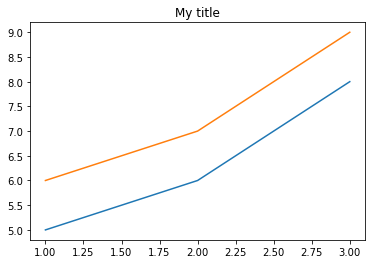

In [2]:
# CREATE A PLOT WITH THE PYPLOT INTERFACE

plt.plot([1,2,3],[5,6,8]) # the plot is created and displayed directly
plt.plot([1,2,3],[6,7,9]) # no variable is created

plt.title("My title"); # the ; at the end of the last line is here to prevent the typical behavior of jupyter
# notebook, which is to print the output of the last line

# OBJECT ORIENTED PROGRAMMING (OOP)


When using OOP, one creates objects that can then be modified individually. It allows more flexibility and control on each elements of a plot. 

The commands are a bit different than with interface programming, better learn directly the OOP commands and skip the pyplot interface commands. 

OOP still requires the use of a couple of pyplot methods like the one to create the objects needed: 
`fig, axes = plt.subplots()`

* `fig` is the figure, a container that will host 1 or more plots.

* `axes` is the collection of plots, also called 'ax', which will be layed out on `fig`.

Plots are called 'ax' because 1 plot (at least a 2 dimensional one) is made of 2 axes (x axis and y axis). 

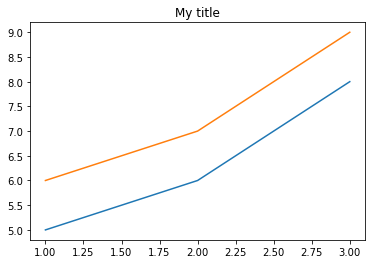

In [3]:
# CREATE A BASIC LINE PLOT WITH PYPLOT OOP

fig, axes = plt.subplots() # here the axes object will contain the default number of subplots: 1

# add elements on the plot
axes.plot([1,2,3],[5,6,8])
axes.plot([1,2,3],[6,7,9])

axes.set_title("My title");

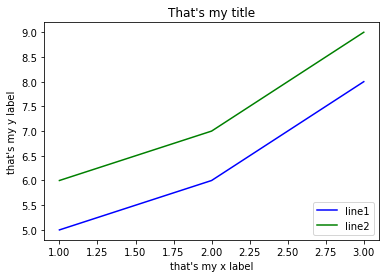

In [4]:
# BASIC CUSTOMIZATIONS

# create a basic plot again
fig, axes = plt.subplots()

axes.plot([1,2,3],[5,6,8], color='blue', label = 'line1') # using color and labels allows to create a legend later
axes.plot([1,2,3],[6,7,9], color='green', label = 'line2')

# BE EXPLICIT:

# Set a title
axes.set_title("That's my title")

# set x and y axes labels
axes.set_ylabel("that's my y label")
axes.set_xlabel("that's my x label")

# add a legend
axes.legend(loc = 'lower right')

# SCATTER PLOTS  


### Explore the relationship between 2 numerical variables
* What type of relationship is it?

![relationship_types >](relationship_types.png)

* How strong is the relationship?
![relationship_degrees >](relationship_degrees.png)


* Can I use one to predict the other?

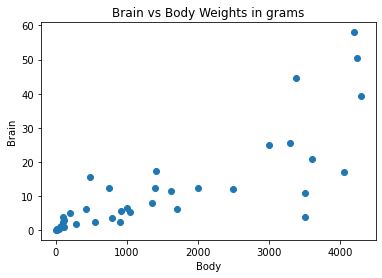

In [5]:
# SCATTER PLOT

fig, axes = plt.subplots()

# Get some data
mammals = data('mammals')
small_mammals = mammals.query("body<=5").copy()
small_mammals['body']=small_mammals.body*1000 # turn kg into grams

axes.scatter(x=small_mammals.body, y=small_mammals.brain)

# Set a title
axes.set_title("Brain vs Body Weights in grams")

# set x and y axes labels
axes.set_xlabel("Body")
axes.set_ylabel("Brain");

# BAR PLOTS

Lines are often used to represent ratios over time, and bars to represent amounts.

Text(0.5, 1.0, 'Average Count of Insects\nKilled By Spray Type')

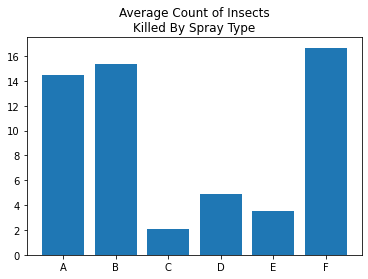

In [6]:
# MAKE A SIMPLE BARPLOT

insect_sprays = data('InsectSprays')

insect_sprays_mean = insect_sprays.groupby('spray')['count'].mean().reset_index()

fig, axes = plt.subplots()

axes.bar(insect_sprays_mean['spray'], insect_sprays_mean['count'])
axes.set_title("Average Count of Insects\nKilled By Spray Type")

<BarContainer object of 1000 artists>

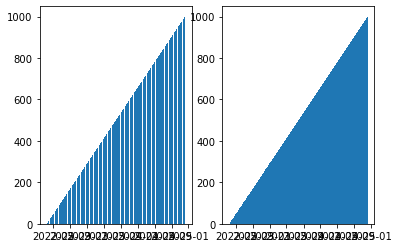

In [7]:
# THE WIDTH ARGUMENT FOR BAR PLOTS

# The default width in a bar plot is 0.8, it is expressed in 'data' units, not in pixel or mm.
# To make it simple, if some bars seem to be missing, they may be too thin to be displayed, so increase the width
# as much as needed

my_date_range = pd.date_range(datetime.datetime.today(), periods=1000).tolist()
my_values = list(range(len(my_date_range)))

fig, axes = plt.subplots(1,2)

axes[0].bar(my_date_range, my_values)
axes[1].bar(my_date_range, my_values, width=1.1)

# View the customize axis ticks labels to rotate them and modify them

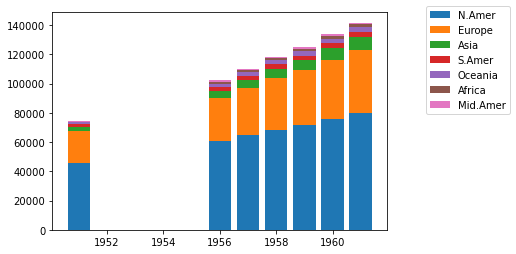

In [8]:
# STACKED BAR PLOT

fig, axes = plt.subplots()

worldphones = data('WorldPhones')

bottom = 0 # bottom is where the bar starts being drawn
for col in worldphones.columns:
    axes.bar(worldphones.index, worldphones[col], bottom = bottom, label=col)
    bottom += worldphones[col] #each time that we draw a bar, we raise the bottom by the height of the bar previously
    # drawned so that in the end they appear stacked

axes.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

## CUSTOMIZE THE AXIS TICK LABELS

#### How format templates work:
![formatting >](formatting.png)

In [9]:
# EXAMPLE OF FORMAT TEMPLATES

my_formats = {'format_name':['percentage','dollar','euro','decimals','comma_sep_thousands_no_dec'],
              'format_templates':['{:,.2%}','${:,.0f}','{:,.0f}€','{:,.2f}','{:,.0f}']}

print(">>> Common format templates:")
pd.DataFrame(my_formats).style.hide_index()

>>> Common format templates:


format_name,format_templates
percentage,"{:,.2%}"
dollar,"${:,.0f}"
euro,"{:,.0f}€"
decimals,"{:,.2f}"
comma_sep_thousands_no_dec,"{:,.0f}"


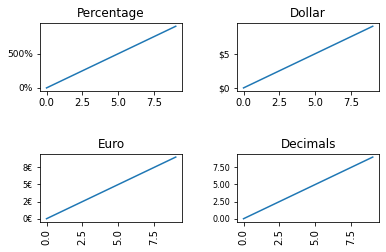

In [10]:
# BASIC FORMATTING OF THE AXIS TICK LABELS

# make example data:
dummy_data = pd.DataFrame({"x":range(10),
                          "y":range(10)})
                           
fig, axes = plt.subplots(2, 2)

# Just plotting 4 times the same data everywhere because we only care about the number formatting on the y axis
axes[0,0].plot(dummy_data.x, dummy_data.y)
axes[0,1].plot(dummy_data.x, dummy_data.y)
axes[1,0].plot(dummy_data.x, dummy_data.y)
axes[1,1].plot(dummy_data.x, dummy_data.y)

# Format the y axes numbers with set_major_formatter

axes[0,0].yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '{:,.0%}'.format(y)))
axes[0,1].yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '${:,.0f}'.format(y)))
axes[1,0].yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p:  '{:,.0f}€'.format(y)))
axes[1,1].yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '{:,.2f}'.format(y)))

# Increase the y tick label size:
axes[0,0].tick_params(axis='y', which='major', labelsize=9)
axes[0,1].tick_params(axis='y', which='major', labelsize=9)
axes[1,0].tick_params(axis='y', which='major', labelsize=8)
axes[1,1].tick_params(axis='y', which='major', labelsize=8)

# Rotate the x ticks labels of the bottom 2 plots
axes[1,0].tick_params(axis='x', which='major', rotation = 90)
axes[1,1].tick_params(axis='x', which='major', rotation = 90)

# Add titles
axes[0,0].set_title("Percentage")
axes[0,1].set_title("Dollar")
axes[1,0].set_title("Euro")
axes[1,1].set_title("Decimals")

# add space between subplots
fig.tight_layout(pad=3.0)

plt.show()

# WHEN THE X AXIS IS DATES

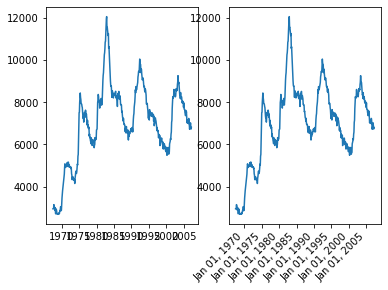

In [11]:
# CUSTOMIZE A DATE AXIS

economics = data('economics')
# make sure that python knows that the date is a date
economics['date'] = pd.to_datetime(economics.date)

fig, axes = plt.subplots(1,2)
axes[0].plot(economics['date'], economics['unemploy'])
axes[1].plot(economics['date'], economics['unemploy'])

x_ticks_position = axes[1].get_xticks() # extract the x axis ticks position (these positions are numbers but 
# these numbers actually represent dates)
x_ticks_position_as_dates = mdates.num2date(x_ticks_position) # turn the positions into actual dates

# Now format them. The default, with this many dates, shows only the year, as numbers. 
# Here we add the day (%d) and show the month as text (%b), just for the example
x_ticks_labels_formatted = [item.strftime('%b %d, %Y') for item in x_ticks_position_as_dates]

# set the ticks positions. why is that needed? just to avoid a dumb warning, it doesn't change anything...
axes[1].xaxis.set_major_locator(tkr.FixedLocator(x_ticks_position))

# set the labels
axes[1].set_xticklabels(x_ticks_labels_formatted, rotation = 45, ha="right");

# Here's the full list of dates format: https://www.programiz.com/python-programming/datetime/strftime

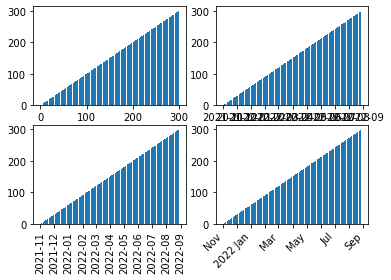

In [12]:
# AVOIDING OVERCROWDING FOR A DATE AXIS:

# simulate data
my_x = range(300)
my_y = range(300)
my_daterange = pd.date_range(datetime.datetime(2021,11,1), periods=300)


# Pyplot decides pretty well how many labels to show based on the space available when the labels are numbers:
fig, axes = plt.subplots(2,2)
axes[0,0].bar(x=my_x, height=my_y);

# When the labels are dates it doesn't work as well
axes[0,1].bar(x=my_daterange, height=my_y)

# Rotating the labels may be enough to make it readable
axes[1,0].bar(x=my_daterange, height=my_y)
axes[1,0].tick_params(axis='x', which='major', rotation = 90)


# But if needed it's also possible to control exactly which labels are shown:
axes[1,1].bar(x=my_daterange, height=my_y)

# Follow the same process as in the previous jupyter cell
x_ticks_position = axes[1,0].get_xticks()
x_ticks_position_as_dates = mdates.num2date(x_ticks_position)

# ADDITIONAL STEP: (show only some labels)
x_ticks_position_as_dates_formatted = []
for date_tick_label in x_ticks_position_as_dates:
    if date_tick_label.month % 2 == 0: # show nothing for even month numbers
        x_ticks_position_as_dates_formatted.append('')
    elif date_tick_label.month == 1: # show the year only when it changes (in January)
        x_ticks_position_as_dates_formatted.append(date_tick_label.strftime('%Y %b'))
    else:
        x_ticks_position_as_dates_formatted.append(date_tick_label.strftime('%b'))

axes[1,1].xaxis.set_major_locator(tkr.FixedLocator(x_ticks_position))

# set the labels
axes[1,1].set_xticklabels(x_ticks_position_as_dates_formatted, rotation = 45, ha="right");


# CREATE A FIGURE WITH MULTIPLE PLOTS

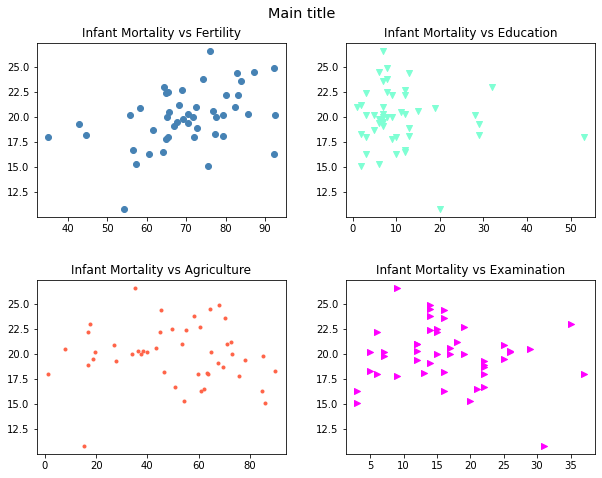

In [14]:
# get data
swiss = data('swiss')


# Here we create 4 plots that will be arranged on 2 rows and 2 columns.
# We use figsize to increase the figure size and leave enough space for all plots. The first number is the 
# width, the second is the height. The default values are: (6.4,4.8)
fig, axes = plt.subplots(2,2, figsize=(9,7)) 

# We access each plot in the object axes using indexing. in our case axes has 2 plots on 2 rows, so we 
# need 2 indices to identify the plot: one for the row, one for the column: axes[0,0] would be the top 
# left plot, axes[0,1] the top right plot, axes[1,0] the bottom left plot and axes[1,1] the bottom right plot.
# Note that if we have only 1 row or one column, for example with plt.subplots(1,2), then only one index is 
# needed, and we would simply use, for example for the first plot: axes[0]

# plot data on each subplot
axes[0,0].scatter(x=swiss.Fertility, y=swiss['Infant.Mortality'], color="steelblue", marker ='o')
axes[0,1].scatter(x=swiss.Education, y=swiss['Infant.Mortality'], color="aquamarine", marker='v')
axes[1,0].scatter(x=swiss.Agriculture, y=swiss['Infant.Mortality'], color="tomato", marker ='.')
axes[1,1].scatter(x=swiss.Examination, y=swiss['Infant.Mortality'], color="fuchsia", marker='>')

# Set a title for each subplot
axes[0,0].set_title("Infant Mortality vs Fertility")
axes[0,1].set_title("Infant Mortality vs Education")
axes[1,0].set_title("Infant Mortality vs Agriculture")
axes[1,1].set_title("Infant Mortality vs Examination")

# add space between subplots
fig.tight_layout(pad=3.0) #default padding is 1.08

# add title to the whole figure
fig.suptitle('Main title', size='x-large') # default title size is 'large'

plt.show()

In [15]:
# Important argument in the plt.subplots() method:
# When plotting subplots that show the same data for 2 subsets of the dataframe: 
# use plt.subplots(1,2, sharey = True) so all subplots share the same y axes

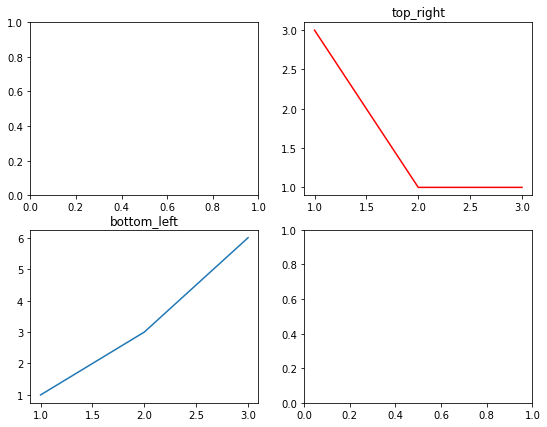

In [16]:
# Trick: Name the subplots when creating the figure to avoid having to use indexing:
fig, [[top_left, top_right], [bottom_left, bottom_right]] = plt.subplots(2,2, figsize=(9,7)) 
top_right.plot([1,2,3],[3,1,1],color='red')
top_right.set_title('top_right')
bottom_left.plot([1,2,3],[1,3,6])
bottom_left.set_title('bottom_left');

# PRESENT THE RESULTS OF AN AB TEST

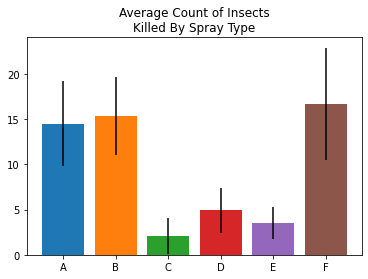

In [17]:
# COMPARE MEANS AND DISPLAY A CONFIDENCE INTERVAL

# About error bars & statistical inference:
# Error bars are usually 1 standard deviation long. 
# Intuitive explanation of what standard deviation is: https://www.mathsisfun.com/data/standard-deviation.html

# If the error bar is long, the individual values are not close to the mean, they are all over the place
# so we consider the mean of our sample less likely to be identical to the mean of the real, entire, population. 
# It may be at this level just because we have too few observations and may be very different if we had more samples.

# The error bars can sometimes be 1 standard error long instead of 1 standard deviation. 
# The standard error is calculated as follows: (standard deviation) / (square root of the number of observations)
# So it can be much smaller than the standard deviation. The idea is that, even if the values are all over the place,
# having a lot of observations means that we are more confident that the mean of our sample is representative of 
# the mean of the entire population, so we make smaller bars when we have many observations

insect_sprays = data('InsectSprays')

fig, axes = plt.subplots()

for sp in insect_sprays.spray.unique():
    insect_sprays_subset = insect_sprays[insect_sprays.spray==sp]
    axes.bar(sp, insect_sprays_subset['count'].mean(), yerr=insect_sprays_subset['count'].std())

axes.set_title("Average Count of Insects\nKilled By Spray Type");

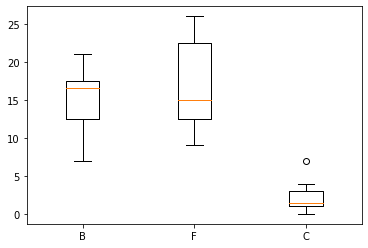

In [18]:
# COMPARE SEVERAL POPULATIONS DISTRIBUTION WITH BOXPLOTS

fig, axes = plt.subplots()

insect_sprays_b = insect_sprays[insect_sprays.spray=='B']
insect_sprays_f = insect_sprays[insect_sprays.spray=='F']
insect_sprays_c = insect_sprays[insect_sprays.spray=='C']

axes.boxplot([insect_sprays_b['count'], insect_sprays_f['count'], insect_sprays_c['count']])
axes.set_xticklabels(['B','F','C'])

plt.show()

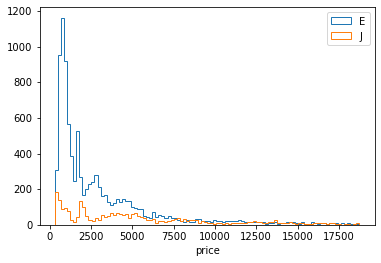

In [19]:
# PLOT HISTOGRAMS TO COMPARE 2 POPULATION DISTRIBUTIONS

fig, axes = plt.subplots()

diamonds = data('diamonds')

diamonds = diamonds[diamonds.color.isin(['E','J'])]

for c in diamonds.color.unique():   
    diamonds_subset = diamonds[diamonds.color == c]
    axes.hist(diamonds_subset['price'], label=c, histtype='step', bins =100)
    axes.set_xlabel('price')

axes.legend()
plt.show()

# MAKE A GANTT CHART

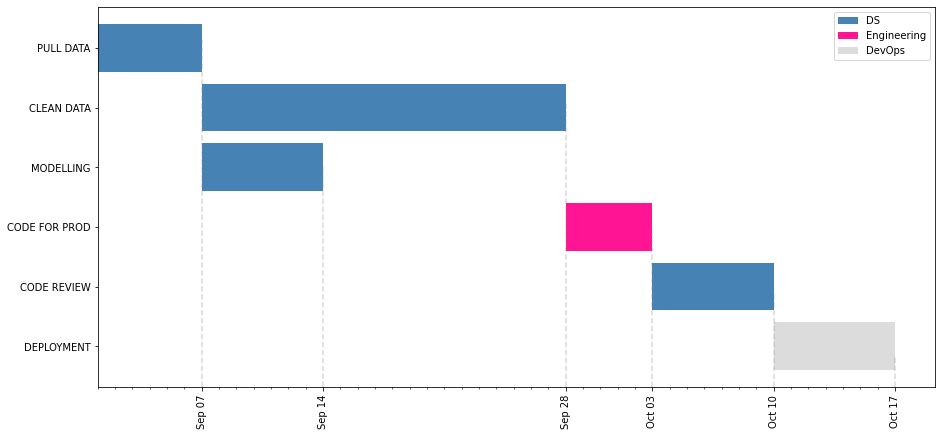

In [20]:
# STRUCTURE OF THE DATA
df = pd.DataFrame({"task":["pull data","clean data","modelling","code for prod","code review","deployment"],
                  "department":["DS","DS","DS","Engineering","DS","DevOps"],
                  "start_date":['2022-09-01', '2022-09-07', '2022-09-07', '2022-09-28','2022-10-03','2022-10-10'],
                  "end_date":['2022-09-07', '2022-09-28', '2022-09-14', '2022-10-03','2022-10-10','2022-10-17']})

df.task = df.task.str.upper()

df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)

# we put the tasks that start first at the bottom because the last bar to be drawn will be the highest on the plot
df.sort_values(["start_date","end_date"],ascending=[False,True], inplace=True)

# where does each bar on the GANTT start and end?
date0 = df.start_date.min() #this is the start of the x axis
df['task_start'] = (df.start_date-date0).dt.days # this where each bar starts
df['task_end'] = (df.end_date-date0).dt.days # this is where each bar ends
df['task_length'] = df.task_end - df.task_start # this is the length of each bar
date_range_project = pd.date_range(date0, end=df.end_date.max())

# assign a color for each dpt
colors_dict = {"DS":"#4682b4","Engineering":"#ff1493","DevOps":"#DCDCDC"}

df['dpt_color'] = df.department.map(colors_dict)

fig, axes = plt.subplots(figsize=(15,7))

# for each end date, draw a line:

unique_end_dates = df.end_date.unique()
position_all_ed = []

for ed in unique_end_dates:
    position_ed = date_range_project.get_loc(ed) # position of date on x axis
    height_of_highest_task = df[df.end_date == ed].index[0] # heigth of lowest bar
    height_of_hihest_task_prop = 1-height_of_highest_task/(df.shape[0]) # height in % of y axis (1 = 100%)
    height_of_hihest_task_prop = height_of_hihest_task_prop - (1/df.shape[0]/2) # decrease the height a little
    axes.axvline(position_ed, ls='--',color="grey",alpha=0.3, ymax=height_of_hihest_task_prop)
    position_all_ed += [position_ed]

axes.barh(df.task, df.task_length, left=df.task_start, color=df.dpt_color)

lgd = [Patch(facecolor=colors_dict[dpt], label=dpt)  for dpt in colors_dict]
axes.legend(handles=lgd)

# show the x label only when a task ends:
big_ticks_position = position_all_ed
big_ticks_labels = date_range_project.strftime("%b %d")
small_ticks_position = range(0, df.task_end.max(), 1)
axes.set_xticks(big_ticks_position)
axes.set_xticks(small_ticks_position, minor=True)
axes.set_xticklabels(big_ticks_labels[position_all_ed], rotation = 90);

# ANNEX 1 - HIGH LEVEL PRINCIPLES

### HIGH DATA/INK RATIO:

* Remove shadow effects
* Remove chart junk
* Remove the background
* Remove redundant labels
* Remove unnecessary borders and grid lines
* Reduce colors
* Remove the special effects of word bubbles
* Remove bolding or using font to communicate information
* Less is more effective: simpler titles and labels
* Keep in mind the data density


### RULES OF COLOR USE

1. Use color only when needed to serve a particular communication goal.
2. Use different colors only when they correspond to differences of meaning in the data.
3. Use soft, natural colors to display most information and bright and/or dark colors to highlight 
information that requires greater attention
4. Non-data components of tables and graphs should be displayed just visibly enough to perform their role, 
but no more so, for excessive salience could cause them to distract attention from the data.

reference: 
http://www.perceptualedge.com/articles/visual_business_intelligence/rules_for_using_color.pdf

# ANNEX 2 - TRICKS

<ipython-input-21-6c8b08193363>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x_ticks_pos_as_dates_formatted, rotation=45, ha='right')


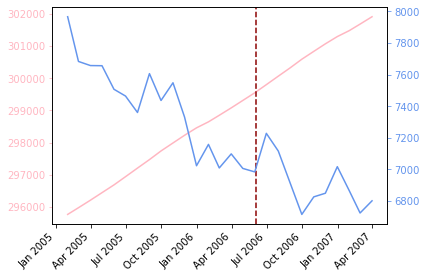

In [21]:
# USE 2 AXES: 2 differents axes on the same plot

economics = data('economics')
# make sure that python knows that the date is a date
economics['date'] = pd.to_datetime(economics.date)
economics_recent = economics.query('date>2005')

fig, axes = plt.subplots()

# plot a metric on the left y axis
axes.plot(economics_recent['date'], economics_recent['pop'], color='lightpink')
axes.tick_params('y', colors='lightpink')

# create an additional y axis (twin x means it uses the x axis of our object 'axes')
axes_twin = axes.twinx()

# plot another metric on the additional y axis
axes_twin.plot(economics_recent['date'], economics_recent['unemploy'], color='cornflowerblue')
axes_twin.tick_params('y', colors='cornflowerblue')

# Let's clean up the date labels on the x axis
x_ticks_pos = axes.get_xticks()
x_ticks_pos_as_dates = mdates.num2date(x_ticks_pos)
x_ticks_pos_as_dates_formatted = [item.strftime('%b %Y') for item in x_ticks_pos_as_dates]
axes.set_xticklabels(x_ticks_pos_as_dates_formatted, rotation=45, ha='right')

# Let's add a vertical axis on a random day as if we wanted to signal the start of something. 
date_for_vertical_line = datetime.datetime(2006,6,2)
axes.axvline(date_for_vertical_line, ls='--',color="darkred")

plt.show()

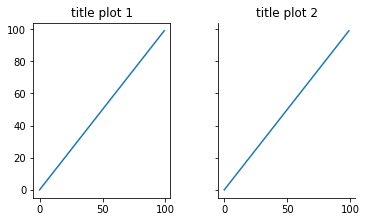

In [26]:
# INCREASE DATA/INK RATIO:

# make 2 plots
fig, axes = plt.subplots(1,2, sharey=True) # using sharey hides the y axis on the right plot as it is the same
axes[0].plot(range(100),range(100))
axes[1].plot(range(100),range(100))
axes[0].set_title("title plot 1")
axes[1].set_title("title plot 2")

# hide the frame around the plot: set spine artists to be invisible
axes[1].spines[['top','right']].set_visible(False) # make top and right spines invisible

# add space between subplots
fig.tight_layout(pad=4.0) #default padding is 1.08

<ipython-input-28-b1c6923435fd>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')


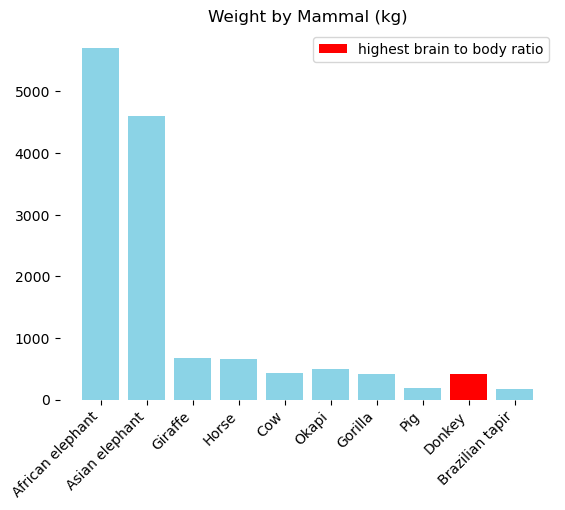

In [28]:
# HIGHLIGHT 1 DATA POINT
fig, axes = plt.subplots() 

# plot every datapoint with a soft color
big_mammals = data('mammals').sort_values("body",ascending=False).head(10)
big_mammals['brain_to_body_ratio']=big_mammals.brain/big_mammals.body

axes.bar(x=big_mammals.index, height=big_mammals.brain, color = '#8BD3E6')

# Now let's plot over the previous plot only the datapoint we want to highlight with a bright color
donkey = big_mammals[big_mammals.index=='Donkey']
axes.bar(x=donkey.index, height=donkey.brain, color = 'red', label="highest brain to body ratio")
#let's use a label so it can be used in a legend
axes.legend() # and let's add a legend to display the label

# Set a title
axes.set_title("Weight by Mammal (kg)")

# remove spines
axes.spines[:].set_visible(False)

# Rotate the ticks labels
plt.draw() # The tick labels are not populated until the figure is drawn so the method axes.get_xticklabels() 
# would return only the positions of the ticks and not the mammals names if we didn't run first plt.draw!
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

plt.show()

# ANNEX 3 - ADVANCED THINGS

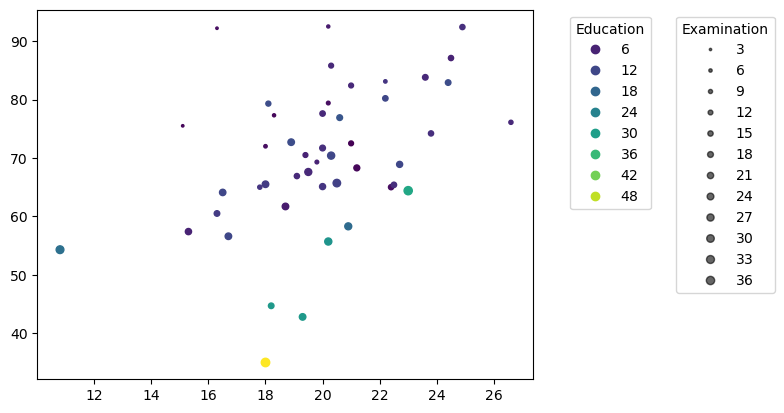

In [30]:
# COMPLEX SCATTER PLOT WITH PYPLOT

# Display the relationship between up to 4 variables at once

fig, axes = plt.subplots()

df = swiss.copy()

x_axis = 'Infant.Mortality'
y_axis = 'Fertility'
colors = 'Education'
sizes = 'Examination'

scatter = axes.scatter(x=df[x_axis], y=df[y_axis], c=df[colors], s= df[sizes], marker ='o') 
# watch out, the argument for the color is not "color" this time, it's just c. 
# the c argument allows to pass a series of values that will be mapped to a color gradient, instead of a single color
# s is the argument for the size of the dots
# instead of just using axes.scatter(), we created a variable called scatter equal to axes.scatter()
# the reason is that we will need to extract the legend elements later from the object

# It's beautiful and everything but the tricky part is adding a legend for both size and colors

# First we create a legend for the colors.
legendcolors = axes.legend(*scatter.legend_elements(), title=colors,
                    loc="upper right", bbox_to_anchor=(1.25, 1)) 
# Instead of just adding the legend to the axes with axes.legend(), we assign the outcome to a variable legendcolors.
# the reason is that, when we create the size legend just below, we will overwrite our color legend
# So we need to add a new container (called a new artist) and give it our color legend:
axes.add_artist(legendcolors)

# Now we can add safely a legend to the axes for the sizes
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
axes.legend(handles, labels, title=sizes, loc="upper right", bbox_to_anchor=(1.5, 1))
# couple of things to note:
# we used loc = 'upper right' to place the legend on the top right corner
# then we used bbox_to_anchor to move the legend further to the right, so it is outside the plot


# ANNEX 4 - OTHER POTENTIALLY USEFUL THINGS

In [31]:
# High level commands

plt.clf() # this command clears any previous plots elements. when some elements on a plot
# seem to be coming from a previous plot, use it.

plt.show() #if the plot does not appear, use that.
# It is here to display the plot. In Jupyter notebook plots are shown by default, even 
# without plt.show(). In pycharm, they're not, so it's necessary there. 

fig.savefig("fig.png", bbox_inches='tight') # useful if you want to integrate the image in an html code and/or make a pdf that 
# contains it. the figure will be saved as a png file in the current repository (the one where the 
# current notebook is)
# bbox_inches='tight' eliminates the unnecessary white space around the image

<Figure size 640x480 with 0 Axes>

In [32]:
# MAKE IT EASIER TO READ: ZOOM IN

# Force the y axis limits to start and end at a certain height
#axes[1].set_ylim([4.95,8.05])

1   1967-06-30
2   1967-07-31
3   1967-08-31
4   1967-09-30
5   1967-10-31
Name: date, dtype: datetime64[ns]


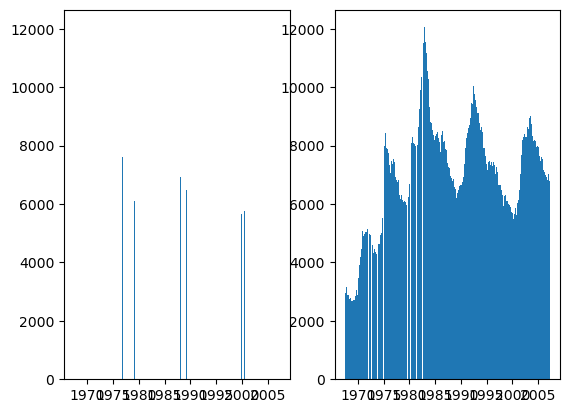

In [33]:
# MAKE A BARPLOT WITH NON CONSECUTIVE DATES
fig, axes = plt.subplots(1,2)

# The default width in a bar plot is 0.8, it is expressed 'data' units. Here we have dates, so the unit is days.
# In this dataset, there is a data point every 30 days or so:
print(economics.head().date)

axes[0].bar(economics['date'], economics['unemploy'])

# Let's pass a width that will cover a full month (30 units of data)
axes[1].bar(economics['date'], economics['unemploy'],width=30);

Get the ticks labels before drawing:
 [Text(0, 0, ''), Text(0, 0, '')]



Get the ticks labels after drawing:
 [Text(0, 0, 'African elephant'), Text(1, 0, 'Asian elephant')]


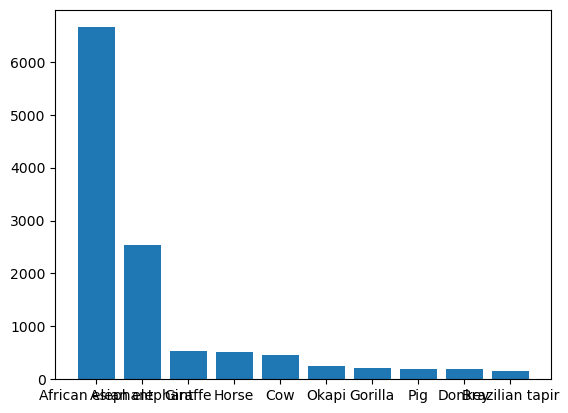

In [34]:
# THE INVISIBLE TICK LABELS:

# when customizing an axis, one may need to retrieve the tick labels with axes.get_xticklabels()
# it's necessary to use plt.draw() first otherwise the tick labels will not be returned properly

fig, axes = plt.subplots() 

# plot every datapoint
big_mammals = data('mammals').sort_values("body",ascending=False).head(10)
big_mammals['brain_to_body_ratio']=big_mammals.brain/big_mammals.body
axes.bar(x=big_mammals.index, height=big_mammals.body)

print("Get the ticks labels before drawing:\n",axes.get_xticklabels()[0:2])

plt.draw() # The tick labels are not populated until the figure is drawn so the method axes.get_xticklabels() 
# returns something meaningless until we run first plt.draw!

print("\n\n")
print("Get the ticks labels after drawing:\n",axes.get_xticklabels()[0:2])

>>> style =  default
>>> style =  seaborn-colorblind
>>> style =  seaborn-pastel
>>> style =  grayscale
>>> style =  bmh


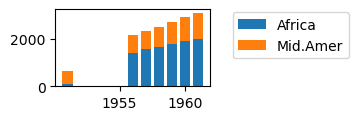

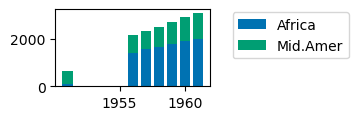

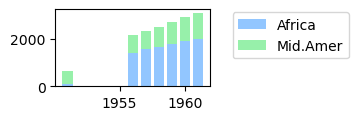

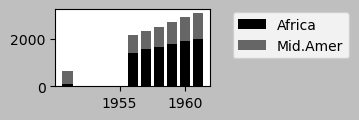

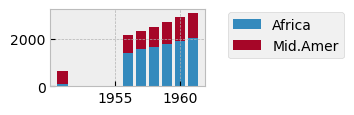

In [35]:
# PLOT STYLES: ADAPT YOUR PLOTS TO YOUR AUDIENCE IF NECESSARY

worldphones = worldphones[["Africa","Mid.Amer"]]

for s in ['default','seaborn-colorblind','seaborn-pastel','grayscale','bmh']:
    print(">>> style = ",s)
    plt.style.use(s) # set up a style
    
    # create a stacked barplot
    fig, axes = plt.subplots(figsize=(2,1))   
    bottom = 0
    for col in worldphones.columns:
        axes.bar(worldphones.index, worldphones[col], bottom = bottom, label=col)
        bottom += worldphones[col]
    axes.legend(bbox_to_anchor=(1.1, 1.05))

    plt.style.use('default') # to reset the settings from the previous style change

[[ 0.  0.  2. 14. 15.  5.  0.  0.]
 [ 0.  0. 10. 16. 16. 15.  1.  0.]
 [ 0.  3. 16. 10. 10. 16.  4.  0.]
 [ 0.  5. 16.  0.  0. 14.  6.  0.]
 [ 0.  5. 16.  6.  0. 12.  7.  0.]
 [ 0.  1. 15. 13.  4. 13.  6.  0.]
 [ 0.  0. 11. 16. 16. 15.  0.  0.]
 [ 0.  0.  2. 11. 13.  4.  0.  0.]]


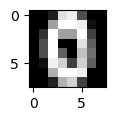

In [36]:
# Drawing with imshow

from matplotlib import pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
print(digits['images'][55])

fig, axes = plt.subplots(figsize=(1, 1))
axes.imshow(digits['images'][55], cmap="gray")
plt.show()